# Bay Wheels (Ford GoBike) Bike Sharing System - 2018

## Investigation Overview
In this investigation, I wanted to look at. [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels)(previously known as Ford GoBike) the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the monthly ride trips data in the year 2018.

## Dataset Overview
The dataset used for this exploratory analysis consists of monthly individual trip data from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area, raw data is available [here](https://s3.amazonaws.com/baywheels-data/index.html). Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the data into a pandas dataframe 

df_biketrips = pd.read_csv('fordgobike_trips_2018_clean.csv')

In [3]:
# Clean up field dtypes

df_biketrips['start_time'] = pd.to_datetime(df_biketrips['start_time'])
df_biketrips['end_time'] = pd.to_datetime(df_biketrips['end_time'])

df_biketrips['start_station_id'] = df_biketrips['start_station_id'].astype('str')
df_biketrips['end_station_id'] = df_biketrips['end_station_id'].astype('str')
df_biketrips['bike_id'] = df_biketrips['bike_id'].astype('str')

df_biketrips['user_type'] = df_biketrips['user_type'].astype('category')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_biketrips['start_dayofweek'] = df_biketrips['start_dayofweek'].astype(weekdaycat)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_biketrips['start_month'] = df_biketrips['start_month'].astype(monthcat)

# Test
df_biketrips.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835478 entries, 0 to 1835477
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1835478 non-null  int64         
 1   start_time               1835478 non-null  datetime64[ns]
 2   end_time                 1835478 non-null  datetime64[ns]
 3   start_station_id         1835478 non-null  object        
 4   start_station_name       1824136 non-null  object        
 5   start_station_latitude   1835478 non-null  float64       
 6   start_station_longitude  1835478 non-null  float64       
 7   end_station_id           1835478 non-null  object        
 8   end_station_name         1824136 non-null  object        
 9   end_station_latitude     1835478 non-null  float64       
 10  end_station_longitude    1835478 non-null  float64       
 11  bike_id                  1835478 non-null  object        
 12  

## User Types and Their Monthly Usage

The majority of the bike usage in 2018 was by Subscribers being about 89%, while about 11% were consumed by cusomters (or casual users). Both subscribers and customers ride the most during the summer months with subscribers riding the most in October and customers peaked in July. The usage was clearly not popular during winter season like November, December and January likely due to the weather.

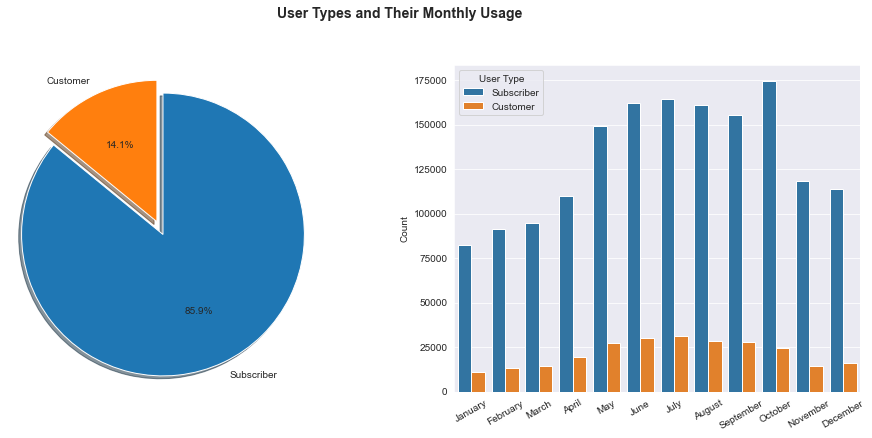

In [4]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df_biketrips.user_type.value_counts() / df_biketrips.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data = df_biketrips, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

## Hourly Usage during Weekdays for Customers and Subscribers

Different usage patterns/habits between the two types of riders are clearly seen. Subscribers used the system heavily on workdays i.e. Monday through Friday, whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9 am and 5-6 pm on workdays for subscribers when used for the work commute, yet casual customers tended to use more in the late afternoon around 5 pm Monday to Friday. Other than the different usage goals, it may also have to do with the traffic situation around these rush hours in the area.

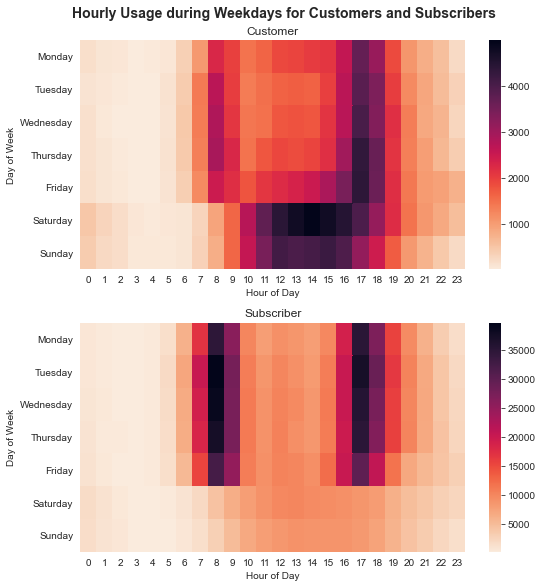

In [5]:
plt.figure(figsize=[8, 8]);

plt.subplot(2, 1, 1)
customers = df_biketrips.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = df_biketrips.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## Average Weekday Trip Duration for Customers and Subscribers

Subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types had an obvious increase in trip duration on Saturdays and Sundays (or weekends), especially casual customers. Subscriber usage was more efficient than customers overall and maintained a pretty consistent average duration Monday through Friday.


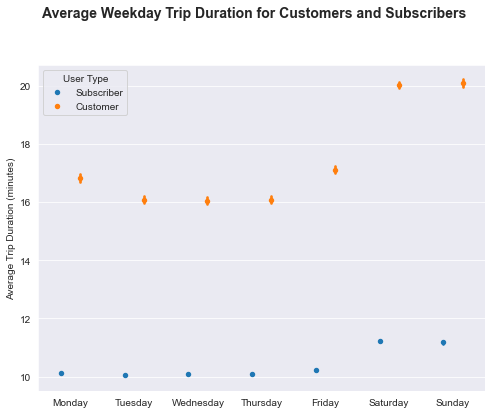

In [6]:
plt.figure(figsize=[8, 6]);
ax = sb.pointplot(data = df_biketrips, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, markers='.', linestyles="", hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xlabel('');
plt.ylabel('Average Trip Duration (minutes)');
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

# Summary

There were a lot more subscribers using the bike-sharing system than casual customers overall, both of which ride the most during the summer season and the least during the winter months. Obviously different usage patterns and riding habits are observed between the two types of riders. Subscribers used the system heavily on workdays concentrated around 8-9 am and 5-6 pm for the work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tended to have much shorter/quicker trips compared to customers which make subscriber usage more efficient.

In [7]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 715088 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "D:\Empty\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "D:\Empty\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "D:\Empty\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "D:\Empty\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "D:\Empty\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  F